In [1]:
import network
import mnist_loader
import random
import numpy as np
import seaborn
%matplotlib inline
import sys
sys.path.append("../fig/")
import mnist
import moviepy.editor as mpy
from matplotlib import pyplot as plt
from matplotlib import animation

/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/usr/local/lib/python2.7/dist-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
training_data, validation_data, test_data = mnist_loader.load_data()

In [3]:
type(training_data)

tuple

In [4]:
training_data[1]

array([5, 0, 4, ..., 8, 4, 8])

In [5]:
print len(training_data[0])
print len(training_data[1])
print len(training_data)

50000
50000
2


In [6]:
from collections import defaultdict
T = defaultdict(list)

In [7]:
for img,digit in zip(training_data[0],training_data[1]):
    T[digit].append(img)

In [8]:
# making sure our d is what we expect it to be
print T.keys()

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [9]:
# Checking the cardinality of T_d for each d
#for digit in T.keys():
for digit in range(0,10):
    print len(T[digit])

4932
5678
4968
5101
4859
4506
4951
5175
4842
4988


In [10]:
# fix d = 0 for now
# choose x1 and x2 uniformly at random
i1,i2 = random.sample(xrange(len(T[0])-1),2)
#print i1,i2
x1,x2 = T[0][i1],T[0][i2]
#print x1
#print x2

In [11]:
x = x2 - x1
#>>> x = numpy.array([0,1,2,3,0,5,6,0,8,9])
#>>> numpy.nonzero(x)
#(array([1, 2, 3, 5, 6, 8, 9]),)
S = set(np.nonzero(x)[0])

In [12]:
def jx(j,x):
    vec = np.zeros_like(x)
    vec[j] = x[j] 
    return vec

def select_random_j(S):
    return random.choice(tuple(S))

In [13]:
y = [0]*len(S)
y[0] = x1

num_S = len(S)
for i in range(1,num_S):
    j = select_random_j(S)
    S.remove(j)
    y[i] = y[i-1] + jx(j,x)

In [14]:
def unflatten_images(flattened_images):
    return [np.reshape(f, (-1, 28)) for f in flattened_images]

what x1 looks like:


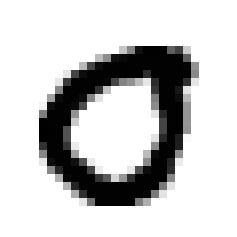

what x2 looks like:


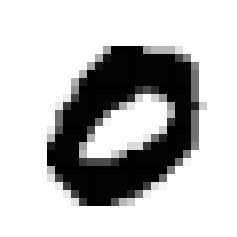

In [15]:
img_x1,img_x2 = unflatten_images([x1,x2])
print "what x1 looks like:"
mnist.plot_mnist_digit(img_x1)
print "what x2 looks like:"
mnist.plot_mnist_digit(img_x2)

In [22]:
from tempfile import NamedTemporaryFile

VIDEO_TAG = """<video controls>
 <source src="data:video/x-m4v;base64,{0}" type="video/mp4">
 Your browser does not support the video tag.
</video>"""

def anim_to_html(anim):
    if not hasattr(anim, '_encoded_video'):
        with NamedTemporaryFile(suffix='.mp4') as f:
            anim.save(f.name, fps=20, extra_args=['-vcodec', 'libx264'])
            video = open(f.name, "rb").read()
        anim._encoded_video = video.encode("base64")
    
    return VIDEO_TAG.format(anim._encoded_video)

from IPython.display import HTML

def display_animation(anim):
    plt.close(anim._fig)
    return HTML(anim_to_html(anim))

([], <a list of 0 Text yticklabel objects>)

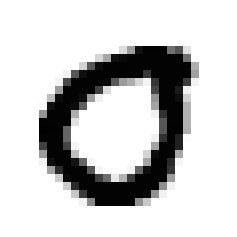

In [24]:
y_imgs = unflatten_images(y)

def update(i):
    #print i #works now! after upgrading to matplotlib 1.5.1
    global y_imgs, mat
    mat.set_data(y_imgs[i])
    return mat 

def init():
    mat.set_data(y_imgs[0])
    return mat

'''
def data_gen():
    for i in range(1,len(y_imgs)):
        yield y_imgs[i]
'''

fig, ax = plt.subplots()
mat = ax.matshow(y_imgs[0])
anim = animation.FuncAnimation(fig=fig, init_func=init, func=update, frames=len(y_imgs), interval=10, blit=False)
plt.xticks(np.array([]))
plt.yticks(np.array([]))
#plt.show()

In [37]:
def unflatten_images(flattened_images):
    return [np.reshape(f, (-1, 28)) for f in flattened_images]

def jx(j,x):
    vec = np.zeros_like(x)
    vec[j] = x[j] 
    return vec

def select_random_j(S):
    return random.choice(tuple(S))

In [43]:
def generate_new_data(d):
    i1,i2 = random.sample(xrange(len(T[d])-1),2)
    x1,x2 = T[d][i1],T[d][i2]
    x = x2 - x1
    S = set(np.nonzero(x)[0])

    y = [0]*len(S)
    y[0] = x1

    num_S = len(S)
    for i in range(1,num_S):
        j = select_random_j(S)
        S.remove(j)
        y[i] = y[i-1] + jx(j,x)
        
    img_x1,img_x2,img_x = unflatten_images([x1,x2,x])
    print "what x1 looks like:"
    mnist.plot_mnist_digit(img_x1)
    print "what x2 looks like:"
    mnist.plot_mnist_digit(img_x2)
    print "what x looks like:"
    mnist.plot_mnist_digit(img_x)
    
    
    y_imgs = unflatten_images(y)

    def update(i):
        global y_imgs, mat
        mat.set_data(y_imgs[i])
        return mat 

    def init():
        global y_imgs
        mat.set_data(y_imgs[0])
        return mat
        
    fig, ax = plt.subplots()
    mat = ax.matshow(y_imgs[0])
    anim = animation.FuncAnimation(fig=fig, init_func=init, func=update, frames=len(y_imgs), interval=10, blit=False)
    plt.xticks(np.array([]))
    plt.yticks(np.array([]))

    #anim.save('animation-'+str(d)+'.mp4',writer='ffmpeg', fps=20)
    anim.save('animation-'+str(d)+'.gif',writer='imagemagick', fps=20)
    
    return y

what x1 looks like:


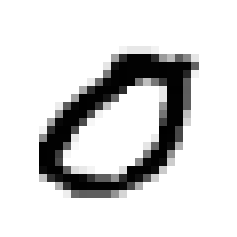

what x2 looks like:


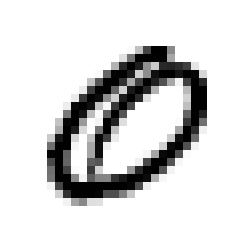

what x looks like:


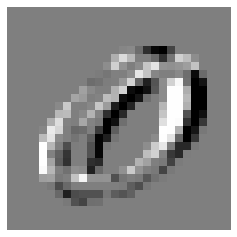

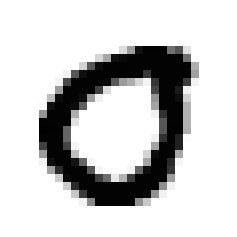

In [44]:
y_0 = generate_new_data(0)

In [36]:
len(y_1)

108